### Accuracy & Noise | Decision Tree Classifier

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import warnings
import seaborn as sns
import random as random

warnings.filterwarnings("ignore")



In [2]:
iris = load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

df['rand1'] = np.random.randint(0, 2, df.shape[0])
df['rand2'] = np.random.randint(0, 2, df.shape[0])
df['rand3'] = np.random.randint(0, 2, df.shape[0])
df['rand4'] = np.random.randint(0, 2, df.shape[0])

all_inputs = df[iris['feature_names']].values
all_inputs_with_random = df[iris['feature_names']+['rand1', 'rand2', 'rand3','rand4']].values
all_classes = df['target'].values



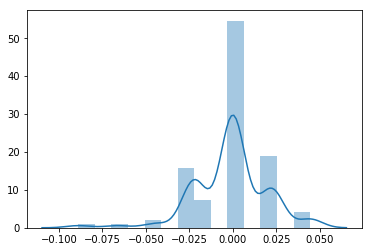

In [3]:
dif = []

for i in range(100):
    a = random.randint(0,1000)

    (train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state = a)

    dtc1 = DecisionTreeClassifier()
    dtc1.fit(train_inputs, train_classes)

    a1 = dtc1.score(test_inputs, test_classes)

    (train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs_with_random, all_classes, train_size=0.7, random_state = a)

    dtc2 = DecisionTreeClassifier()
    dtc2.fit(train_inputs, train_classes)

    a2 = dtc2.score(test_inputs, test_classes)

    dif.append(a1-a2)


sns.distplot(dif)